In [1]:
!pip install ultralytics --quiet

In [2]:
import cv2
from tensorflow.config import list_physical_devices
from ultralytics import YOLO, __version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
from pathlib import Path

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load a model
# YOLOv8n   nano
# YOLOv8s   small
# YOLOv8m	medium
# YOLOv8l	large
# YOLOv8x   xlarge
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

__version__ # 8.0.92

100%|██████████| 21.5M/21.5M [00:00<00:00, 77.0MB/s]


'8.0.92'

## Seed it all

In [4]:
def seed_it_all(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

SEED = 42
seed_it_all(SEED)  # Reproducible

# Data

- 100 images version : "https://universe.roboflow.com/ds/2CmvgFyGkd?key=icMGXIAKBg"
- 1000 images version : "https://app.roboflow.com/ds/R6JxsTXqjk?key=uDQGjYyW8k"

In [5]:
!rm -r dataset
!mkdir dataset
%cd dataset
!curl -L "https://app.roboflow.com/ds/R6JxsTXqjk?key=uDQGjYyW8k" > roboflow.zip 
!unzip roboflow.zip 
!rm roboflow.zip
%cd ..

rm: cannot remove 'dataset': No such file or directory
/kaggle/working/dataset
curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   4277      0 --:--:-- --:--:-- --:--:--  4298
100 61.3M  100 61.3M    0     0  81.9M      0 --:--:-- --:--:-- --:--:--  254M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/20220721_124131_jpg.rf.14362e2d91933466dfa4de641343aba8.jpg  
 extracting: test/images/20220721_161927_jpg.rf.c268be6aa6dd55e48b684b51777ed28e.jpg  
 extracting: test/images/20220721_162157_jpg.rf.6812005f51d7485da86ee94d56adbd27.jpg  
 extracting: test/images/20220721_162553_jpg.rf.9034409e0ff8af1a6b5df24ea15

In [6]:
DATA = "/kaggle/working/dataset/data.yaml"

# Train model

In [7]:
epochs = 100 if list_physical_devices('GPU') else 1
epochs

100

In [8]:
# https://docs.ultralytics.com/modes/train/#arguments
model.train(data=DATA, epochs=epochs, batch=8, patience=20, cos_lr=True, optimizer="SGD", seed=SEED, exist_ok=True)

Ultralytics YOLOv8.0.92 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/dataset/data.yaml, epochs=100, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=True, pretrained=False, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 93.3MB/s]
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning /kaggle/working/dataset/train/labels... 825 images, 0 backgrounds, 0 corrupt: 100%|██████████| 825/825 [00:00<00:00, 1714.66it/s]
train: New cache created: /kaggle/working/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/dataset/valid/labels... 174 images, 0 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<00:00, 1765.12it/s]
val: New cache created: /kaggle/working/dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 

# Evaluate model

In [9]:
score = model.val()  # evaluate model performance on the validation set
print("-"*100)
print(score)

Ultralytics YOLOv8.0.92 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/dataset/valid/labels.cache... 174 images, 0 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.63it/s]
                   all        174       1056      0.872      0.796      0.857      0.551
                 Glass        174         80      0.877      0.712      0.844      0.437
                Gloves        174        236      0.953      0.831      0.924      0.602
                Helmet        174        124      0.957      0.895      0.959       0.59
             No-Helmet        174         40      0.873      0.862      0.938      0.652
                Person        174        165      0.937      0.915      0.945        0.7
           Pri

----------------------------------------------------------------------------------------------------
ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x732f10ac9c30>
fitness: 0.5815215184717129
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.43662,     0.60177,     0.58969,     0.65221,     0.70046,     0.45914,     0.25519,     0.55297,     0.71028])
names: {0: 'Glass', 1: 'Gloves', 2: 'Helmet', 3: 'No-Helmet', 4: 'Person', 5: 'Prise_libre', 6: 'Prise_occupe', 7: 'Safety-Boot', 8: 'Safety-Vest'}
plot: True
results_dict: {'metrics/precision(B)': 0.8721311055816404, 'metrics/recall(B)': 0.7957255949210339, 'metrics/mAP50(B)': 0.8568969250357563, 'metrics/mAP50-95(B)': 0.550924251075708, 'fitness': 0.5815215184717129}
save_dir: Pos

In [10]:
score.results_dict

{'metrics/precision(B)': 0.8721311055816404,
 'metrics/recall(B)': 0.7957255949210339,
 'metrics/mAP50(B)': 0.8568969250357563,
 'metrics/mAP50-95(B)': 0.550924251075708,
 'fitness': 0.5815215184717129}

## Benchmark 1000 image

---

- model=yolov8m.pt epochs=10 batch=8 optimizer="SGD"
    - 10 epochs completed in 0.114 hours (6min50s).
    - Speed: 1.7ms preprocess, 10.8ms inference, 0.0ms loss, 6.1ms postprocess per image
    - {'metrics/precision(B)': 0.7137401436958013, <br>
 'metrics/recall(B)': 0.3906436990811346,<br>
 'metrics/mAP50(B)': 0.4122662011868973,<br>
 'metrics/mAP50-95(B)': 0.1558081419868786,<br>
 'fitness': 0.18145394790688046}


 ---


- model=yolov8x.pt epochs=10 batch=8 optimizer="SGD"
    - 10 epochs completed in 0.206 hours (12min21s).
    - Speed: 1.3ms preprocess, 26.0ms inference, 0.0ms loss, 4.8ms postprocess per image
    - {'metrics/precision(B)': 0.845172361911081,<br>
 'metrics/recall(B)': 0.7892870177235691,<br>
 'metrics/mAP50(B)': 0.8591855579785578,<br>
 'metrics/mAP50-95(B)': 0.5227015082444837,<br>
 'fitness': 0.5563499132178911}


 ---

- model=yolov8x.pt epochs=100 batch=8 optimizer="SGD"
    - 100 epochs completed in 1.927 hours
    - Speed: 1.4ms preprocess, 69.5ms inference, 0.0ms loss, 3.3ms postprocess per image
    - {'metrics/precision(B)': 0.8775935812722815,<br>
 'metrics/recall(B)': 0.8308274089045242,<br>
 'metrics/mAP50(B)': 0.888124107897165,<br>
 'metrics/mAP50-95(B)': 0.5817336605969997,<br>
 'fitness': 0.6123727053270163}


---


- model=yolov8s.pt epochs=50 batch=8 optimizer="SGD"
    - 50 epochs completed in 0.450 hours.
    - Speed: 2.0ms preprocess, 6.4ms inference, 0.0ms loss, 1.9ms postprocess per image
    - {'metrics/precision(B)': 0.8642318285633591,<br>
 'metrics/recall(B)': 0.8149273588244231,<br>
 'metrics/mAP50(B)': 0.860376684820912,<br>
 'metrics/mAP50-95(B)': 0.5403261716011794,<br>
 'fitness': 0.5723312229231526}
 
 
 ---


- model=yolov8s.pt epochs=100 batch=8 optimizer="SGD"
    - 100 epochs completed in 0.890 hours.
    - Speed: 1.4ms preprocess, 6.8ms inference, 0.0ms loss, 1.9ms postprocess per image
    - {'metrics/precision(B)': 0.8721311055816404,<br>
 'metrics/recall(B)': 0.7957255949210339,<br>
 'metrics/mAP50(B)': 0.8568969250357563,<br>
 'metrics/mAP50-95(B)': 0.550924251075708,<br>
 'fitness': 0.5815215184717129}
    

# Prediction

In [11]:
val_dir_im = Path("/kaggle/working/dataset/test/images")

val_im = []
for path in val_dir_im.glob("*.jpg"):
    val_im.append(str(path))


In [12]:
val_im_path = np.random.choice(val_im)
results = model.predict(val_im_path)  # predict on an image

val_im_path


image 1/1 /kaggle/working/dataset/test/images/image_154_jpg.rf.377f47041ae2bb77a93b164679d836dc.jpg: 640x640 1 Gloves, 1 Helmet, 1 Person, 2 Safety-Boots, 1 Safety-Vest, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


'/kaggle/working/dataset/test/images/image_154_jpg.rf.377f47041ae2bb77a93b164679d836dc.jpg'

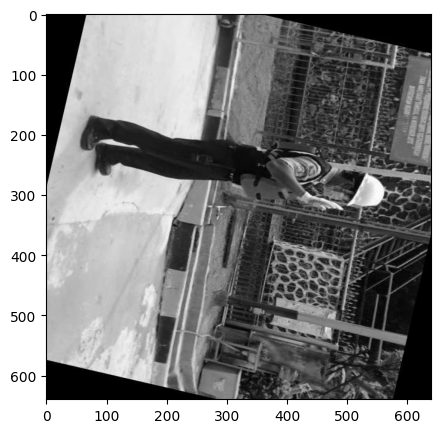

In [13]:
img = results[0].orig_img

plt.figure(figsize=(7, 5))
plt.grid(False)
plt.imshow(img)

## Usefull function

In [14]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)
    p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
    if label:
        tf = max(lw - 1, 1)  # font thickness
        w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image,
                    label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                    0,
                    lw / 3,
                    txt_color,
                    thickness=tf,
                    lineType=cv2.LINE_AA)


In [15]:
LABELS = {0: 'Glass', 1: 'Gloves', 2: 'Helmet', 3: 'No-Helmet', 4: 'Person', 5: 'Prise_libre', 6: 'Prise_occupe', 7: 'Safety-Boot', 8: 'Safety-Vest'}
COLORS = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135)]

In [16]:
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
    if labels == []:
        labels = LABELS
    if colors == []:
        colors = COLORS

    #plot each boxes
    for box in boxes:
        if score :
            label = labels[int(box[-1])] + " " + str(round(100 * float(box[-2]),1)) + "%"
        else :
            label = labels[int(box[-1])]
        #filter every box under conf threshold if conf threshold setted
        if conf :
            if box[-2] > conf:
                color = colors[int(box[-1])]
                box_label(image, box, label, color)
        else:
            color = colors[int(box[-1])]
            box_label(image, box, label, color)

        #show image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image) 

## Plot box

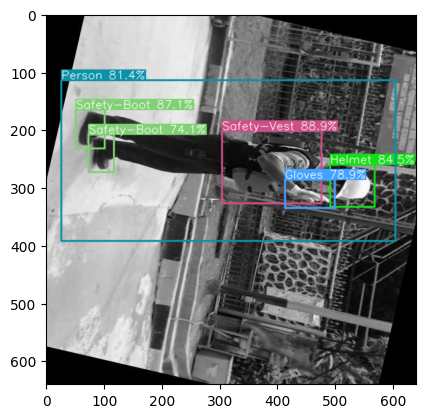

In [17]:
plot_bboxes(img, results[0].boxes.data, score=True)

# Visualize

In [18]:
TRAIN_DIR = Path.cwd() / "runs" / "detect" / "train"

png_im = []
for path in TRAIN_DIR.glob("*.png"):
    png_im.append( (cv2.imread(str(path)), path) )
    print(path)

/kaggle/working/runs/detect/train/confusion_matrix.png
/kaggle/working/runs/detect/train/results.png
/kaggle/working/runs/detect/train/PR_curve.png
/kaggle/working/runs/detect/train/R_curve.png
/kaggle/working/runs/detect/train/F1_curve.png
/kaggle/working/runs/detect/train/P_curve.png


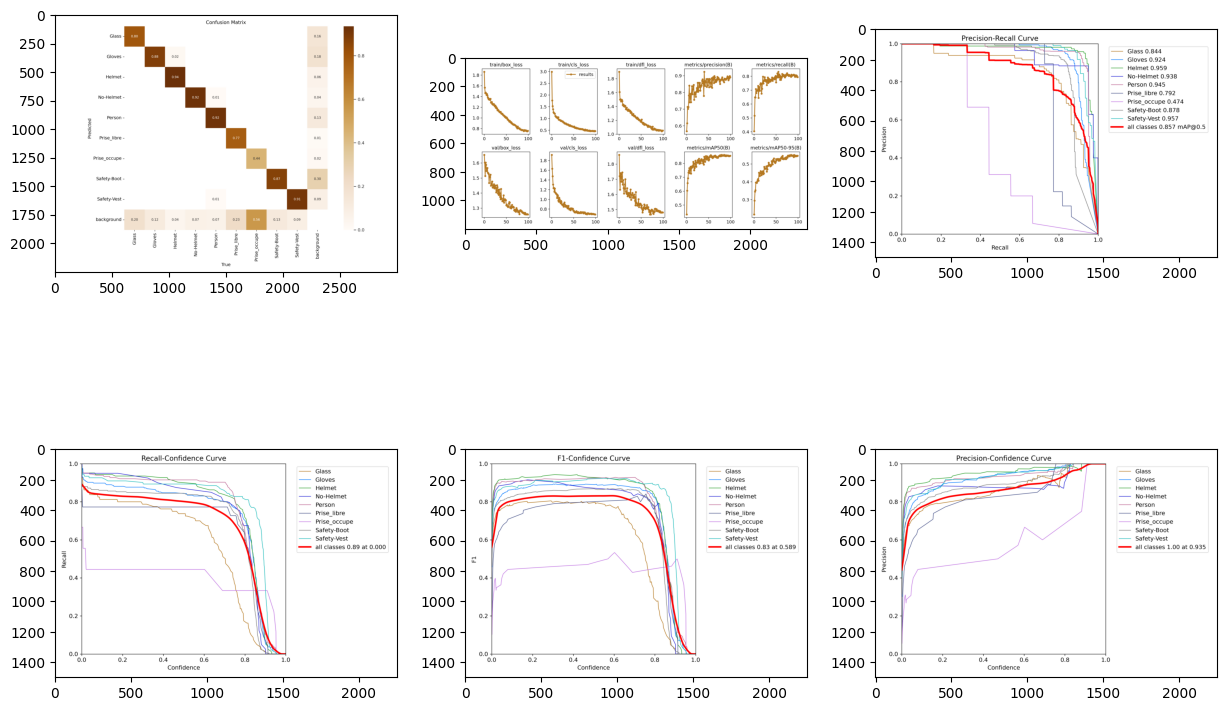

In [19]:
ncols = 3
nrows = int(np.ceil(len(png_im)/ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
axs = axs.flatten()

for ax, im in zip(axs, png_im):
    ax.imshow(im[0])

## Save history

In [20]:
!pwd

/kaggle/working


rm: cannot remove 'save_history': No such file or directory
/kaggle/working/save_history


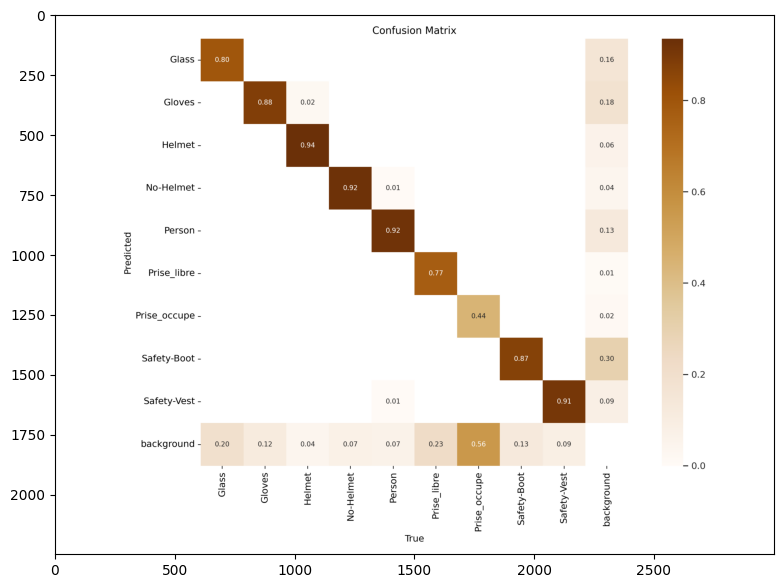

<Figure size 640x480 with 0 Axes>

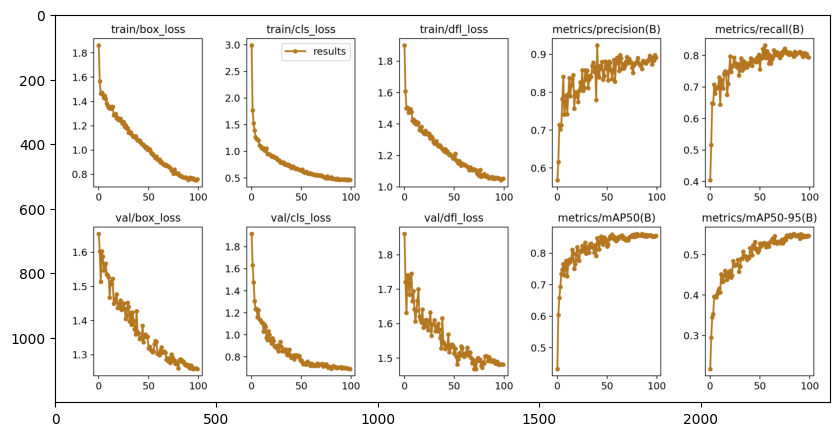

<Figure size 640x480 with 0 Axes>

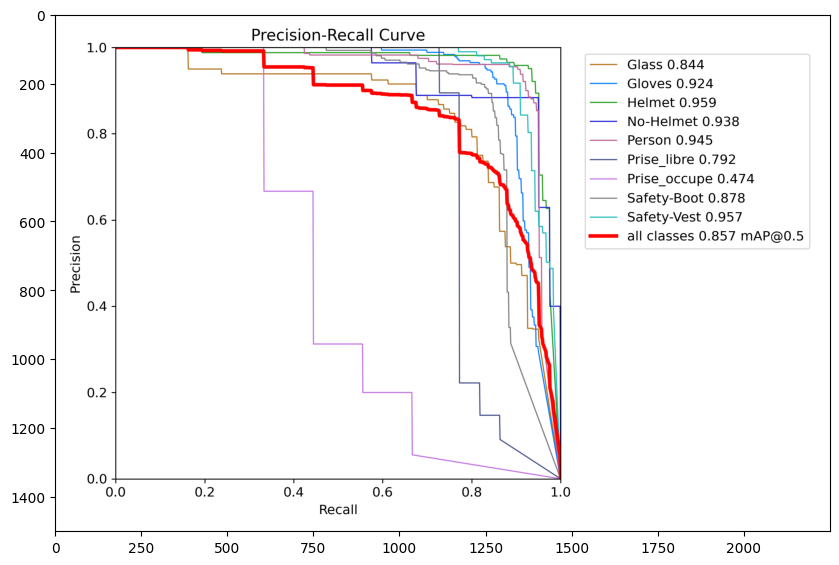

<Figure size 640x480 with 0 Axes>

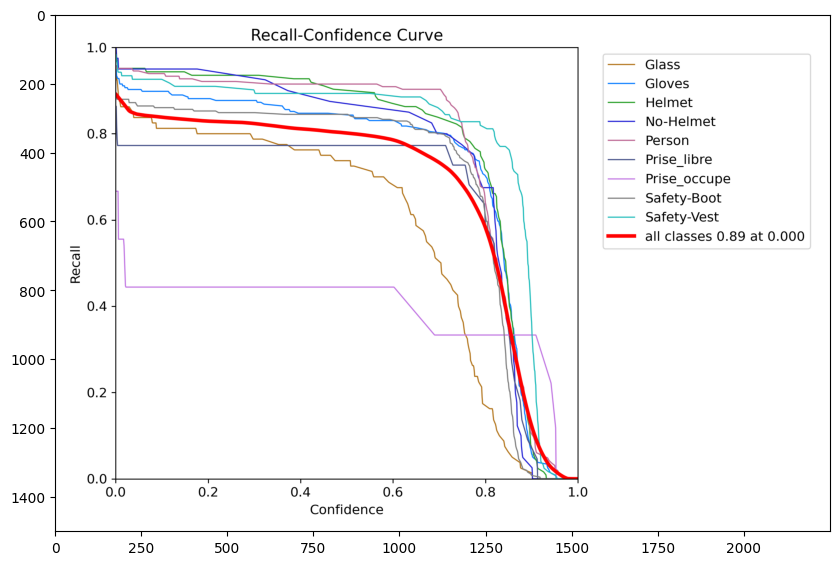

<Figure size 640x480 with 0 Axes>

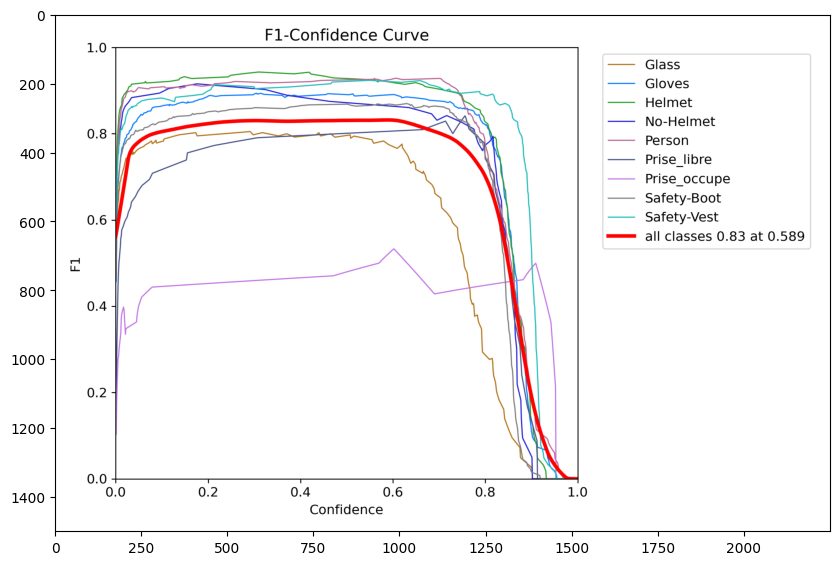

<Figure size 640x480 with 0 Axes>

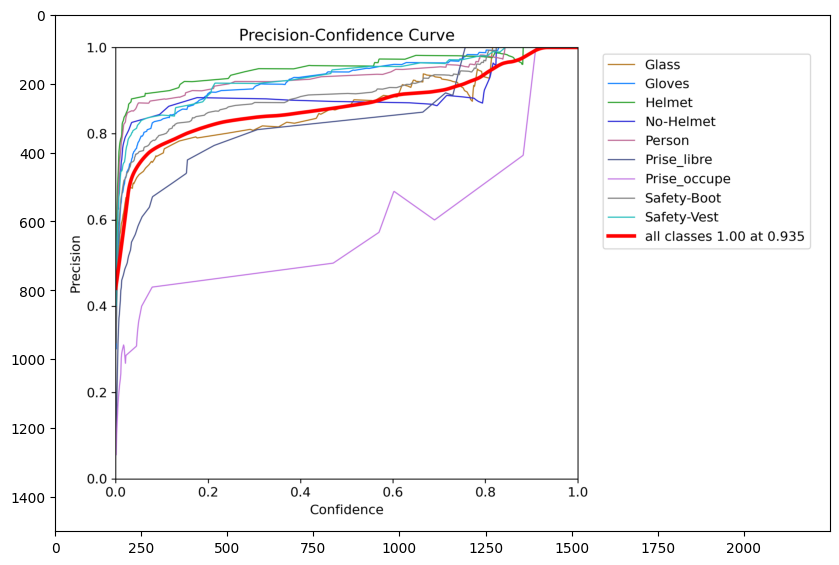

/kaggle/working
  adding: save_history/ (stored 0%)


<Figure size 640x480 with 0 Axes>

In [21]:
!rm -r save_history
!mkdir save_history
%cd save_history

save_history_path = "save_history"

for im_and_path in png_im:
    name = Path(im_and_path[1]).name
    plt.figure(figsize=(10, 7))
    plt.imshow(im_and_path[0])
    plt.show()
    plt.savefig(name)
    plt.clf()
    
%cd ..
!zip save_history.zip $save_history_path

## Visualize jpg

In [22]:
jpg_im = []
for path in TRAIN_DIR.glob("*.jpg"):
    jpg_im.append(cv2.imread(str(path)))
    print(path)

/kaggle/working/runs/detect/train/val_batch2_labels.jpg
/kaggle/working/runs/detect/train/val_batch1_labels.jpg
/kaggle/working/runs/detect/train/val_batch2_pred.jpg
/kaggle/working/runs/detect/train/labels_correlogram.jpg
/kaggle/working/runs/detect/train/train_batch1.jpg
/kaggle/working/runs/detect/train/val_batch0_labels.jpg
/kaggle/working/runs/detect/train/labels.jpg
/kaggle/working/runs/detect/train/train_batch0.jpg
/kaggle/working/runs/detect/train/train_batch2.jpg
/kaggle/working/runs/detect/train/val_batch0_pred.jpg
/kaggle/working/runs/detect/train/val_batch1_pred.jpg


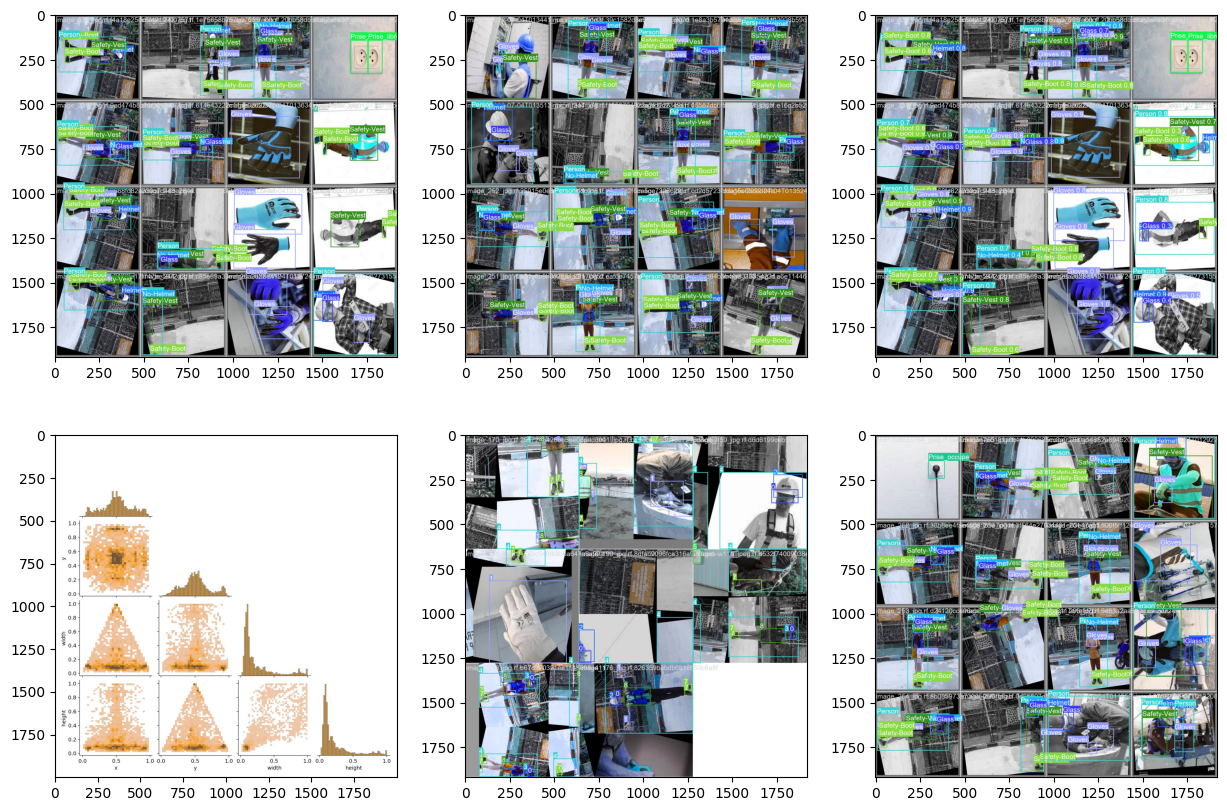

In [23]:
ncols = 3
nrows = int(np.ceil(len(png_im)/ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
axs = axs.flatten()

for ax, im in zip(axs, jpg_im):
    ax.imshow(im)

# ONNX

ONNX (Open Neural Network Exchange) is an open-source format for representing deep learning models. It is designed to provide interoperability between different deep learning frameworks such as TensorFlow, PyTorch, and others. The main goal of ONNX is to enable developers to train models using one framework and then deploy them on another framework for inference without any retraining or conversion issues.

In the context of YOLO, ONNX can be used to represent the trained YOLO model in a standard format that can be easily shared and deployed across different frameworks and platforms. This helps developers to avoid being locked into a specific framework and provides more flexibility in terms of deployment options.

For example, you might train a YOLO model using PyTorch and then export the model to the ONNX format. This ONNX model can then be imported into another framework, like TensorFlow or ONNX Runtime, for further optimization or deployment on a wide range of devices, including CPUs, GPUs, and specialized accelerators.

In summary, ONNX serves as a bridge between different deep learning frameworks, making it easier to share and deploy models, including YOLO object detection models, across various platforms and devices.

In [24]:
# if list_physical_devices('GPU') :
#     !pip install onnxruntime-gpu --quiet 
# else :
#     !pip install onnxruntime --quiet

# !pip install onxx --quiet

In [25]:
onnx_model_path = model.export(format="onnx")

Ultralytics YOLOv8.0.92 🚀 Python-3.10.10 torch-2.0.0 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (8, 3, 640, 640) BCHW and output shape(s) (8, 13, 8400) (21.5 MB)

ONNX: starting export with onnx 1.13.1 opset 17...
ONNX: export success ✅ 4.1s, saved as runs/detect/train/weights/best.onnx (42.7 MB)

Export complete (10.5s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/kaggle/working/dataset/data.yaml 
Visualize:       https://netron.app


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



# Download

In [26]:
!pwd

/kaggle/working


In [27]:
from IPython.display import FileLink

FileLink(onnx_model_path)

/kaggle/working/runs/detect/train/weights/best.onnx

In [28]:
best_model = "runs/detect/train/weights/best.pt"
FileLink(best_model)

/kaggle/working/runs/detect/train/weights/best.pt

In [29]:
history = "save_history.zip"
FileLink(history)

/kaggle/working/save_history.zip